# ML Fairness

In [17]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True, context="talk")
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.layers import Input, Dense, Dropout
from keras.models import Model

from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.preprocessing import OrdinalEncoder

import keras as ke
import keras.backend as K
create_gif = False

print(os.getcwd())
print("Modules imported \n")
import os

/content
Modules imported 



In [39]:
mimic_data = pd.read_csv('https://raw.githubusercontent.com/RonaldsonBellande/AI_Prioritization/master/mimic3d.csv')
data_full = mimic_data.drop('ethnicity', 1)
data_full = data_full.drop('age', 1)
data_full = data_full.drop('gender', 1)
data_full

,hadm_id,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,NumCallouts,NumDiagnosis,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,0.16,2.59,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,0.25,2.23,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,0.00,0.75,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,0.41,0.69,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,0.00,3.69,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,24.58,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,DIVORCED,0.00,0.37,...,0.20,0.13,23.11,8.01,0.00,0.08,1315.46,0,1746.31,3
58972,199994,9.75,EMERGENCY,EMERGENCY ROOM ADMIT,MENTAL STATUS CHANGES,Medicare,CATHOLIC,SINGLE,0.00,0.92,...,2.26,0.30,7.90,0.00,0.00,0.31,674.05,0,834.98,2
58973,199995,16.75,EMERGENCY,PHYS REFERRAL/NORMAL DELI,ROOT ABSCESS,Private,PROTESTANT QUAKER,SINGLE,0.00,0.60,...,0.54,0.10,6.27,5.79,0.00,0.36,207.10,0,261.30,3
58974,199998,5.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,0.00,2.72,...,0.17,0.35,12.24,17.69,0.00,1.02,426.87,0,537.42,1


In [40]:
gender = mimic_data['gender'][:]
ethnicity = mimic_data['ethnicity'][:]
age = mimic_data['age'][:]

In [41]:
Z = pd.merge(gender, ethnicity, right_index=True, left_index=True)
Z

,gender,ethnicity
0,F,WHITE
1,M,WHITE
2,F,BLACK/AFRICAN AMERICAN
3,F,WHITE
4,M,WHITE
...,...,...
58971,M,UNKNOWN/NOT SPECIFIED
58972,F,WHITE
58973,M,WHITE
58974,M,WHITE


In [42]:
# encoder = OrdinalEncoder()
# encoder.fit(Z)
# Z = encoder.transform(Z)
# Z
# sensitive attributes; we identify 'gender' and 'ethnicity' as sensitive attributes
Z = Z.assign(ethnicity=lambda df:(df['ethnicity'] == 'WHITE').astype(int))
Z = Z.assign(gender=lambda df:(df['gender'] == 'F').astype(int))
Z

,gender,ethnicity
0,1,1
1,0,1
2,1,0
3,1,1
4,0,1
...,...,...
58971,0,0
58972,1,1
58973,0,1
58974,0,1


In [43]:
for i in range(age.size):
    if (age[i] < 65):
        age[i] = 1
    if (age[i] >= 65):
        age[i] = 0
y = age

In [44]:
y.shape

(58976,)

In [45]:
print("With Ethnicity", mimic_data.shape)
print("Without Ethnicity", data_full.shape)

With Ethnicity (58976, 28)
Without Ethnicity (58976, 25)


In [46]:
data_full.head(10)

,hadm_id,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,NumCallouts,NumDiagnosis,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,0.16,2.59,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,0.25,2.23,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,0.00,0.75,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,0.41,0.69,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,0.00,3.69,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1
5,100010,4.38,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,Private,EPISCOPALIAN,MARRIED,0.23,1.14,...,0.00,0.11,7.99,9.13,1.14,0.91,448.63,0,509.00,1
6,100011,14.38,EMERGENCY,CLINIC REFERRAL/PREMATURE,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,Medicaid,NOT SPECIFIED,SINGLE,0.07,0.97,...,1.88,0.21,18.01,9.94,4.10,0.21,1337.13,0,1482.53,3
7,100012,10.08,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,0.10,1.09,...,0.30,0.15,15.48,14.48,2.28,0.60,524.11,0,618.11,2
8,100014,0.63,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RIGHT SHOULDER ADHESIVE CAPSULITIS/SDA,Medicaid,CATHOLIC,SINGLE,0.00,12.70,...,0.00,0.00,0.00,0.00,0.00,4.76,0.00,0,25.39,0
9,100016,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,PNEUMONIA,Medicare,PROTESTANT QUAKER,SINGLE,0.00,1.78,...,0.81,0.21,16.53,10.05,1.13,0.49,1221.39,0,1315.92,1


In [47]:
X = data_full.drop('LOSgroupNum', 1)
X = X.drop('religion', 1)
X = X.drop('AdmitProcedure', 1)
X = X.drop('AdmitDiagnosis', 1)

X.head()

,hadm_id,LOSdays,admit_type,admit_location,insurance,marital_status,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract
0,100001,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,DIVORCED,0.16,2.59,0.00,1.30,...,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89
1,100003,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,Private,SINGLE,0.25,2.23,0.99,1.98,...,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71
2,100006,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,Private,SINGLE,0.00,0.75,0.17,0.83,...,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00
3,100007,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,Private,MARRIED,0.41,0.69,0.27,0.69,...,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05
4,100009,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,MARRIED,0.00,3.69,0.82,2.25,...,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84


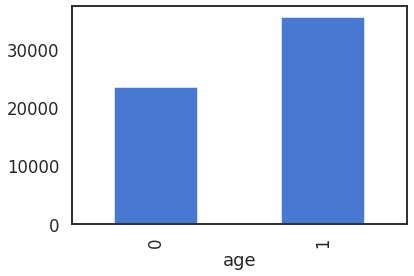

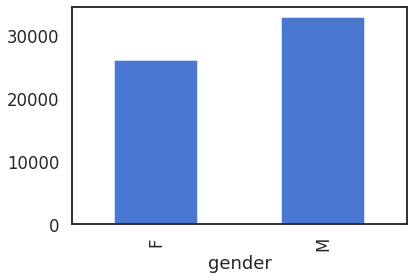

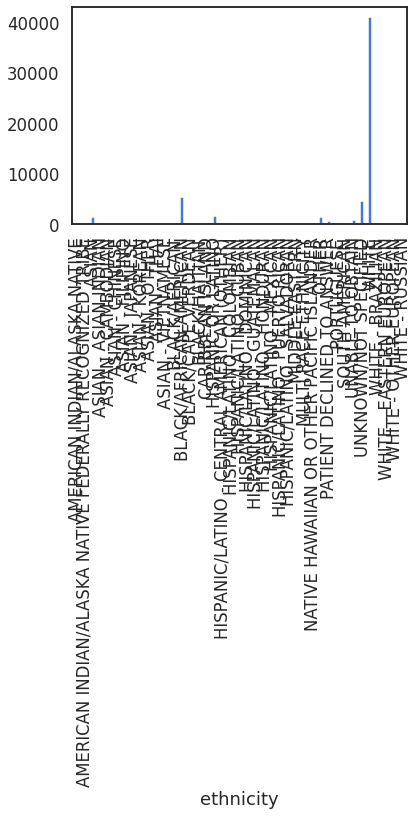

In [48]:
mimic_data.groupby('age').size().plot.bar()
plt.show()
mimic_data.groupby('gender').size().plot.bar()
plt.show()
mimic_data.groupby('ethnicity').size().plot.bar()
plt.show()

In [49]:
categorical_columns = [
                    'admit_type',
                    'admit_location',
                    'insurance',
                    'marital_status'
                      ]

In [50]:
for col in categorical_columns:
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
X

,hadm_id,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,...,Medicare,Private,Self Pay,DIVORCED,LIFE PARTNER,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED
0,100001,6.17,0.16,2.59,0.00,1.30,25.12,43.44,0.65,0.05,...,0,1,0,1,0,0,0,0,0,0
1,100003,4.04,0.25,2.23,0.99,1.98,13.61,55.94,1.24,1.59,...,0,1,0,0,0,0,0,1,0,0
2,100006,12.04,0.00,0.75,0.17,0.83,11.46,33.39,0.33,0.15,...,0,1,0,0,0,0,0,1,0,0
3,100007,7.29,0.41,0.69,0.27,0.69,20.30,32.24,0.69,0.17,...,0,1,0,0,0,1,0,0,0,0
4,100009,4.88,0.00,3.69,0.82,2.25,20.49,50.61,0.61,0.34,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,24.58,0.00,0.37,0.53,0.94,330.92,66.56,0.20,0.13,...,0,1,0,1,0,0,0,0,0,0
58972,199994,9.75,0.00,0.92,0.41,0.62,95.18,53.03,2.26,0.30,...,1,0,0,0,0,0,0,1,0,0
58973,199995,16.75,0.00,0.60,0.54,0.06,12.66,27.28,0.54,0.10,...,0,1,0,0,0,0,0,1,0,0
58974,199998,5.88,0.00,2.72,0.51,0.17,25.85,49.83,0.17,0.35,...,1,0,0,0,0,1,0,0,0,0


In [51]:
# X = X.assign(AdmitDiagnosis=lambda df:(df['AdmitDiagnosis'] == 'DIABETIC KETOACIDOSIS').astype(int))
# X = X.assign(insurance=lambda df:(df['insurance'] == 'Private').astype(int))
# X = X.assign(marital_status=lambda df:(df['marital_status'] == 'DIVORCED').astype(int))
X

,hadm_id,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,...,Medicare,Private,Self Pay,DIVORCED,LIFE PARTNER,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED
0,100001,6.17,0.16,2.59,0.00,1.30,25.12,43.44,0.65,0.05,...,0,1,0,1,0,0,0,0,0,0
1,100003,4.04,0.25,2.23,0.99,1.98,13.61,55.94,1.24,1.59,...,0,1,0,0,0,0,0,1,0,0
2,100006,12.04,0.00,0.75,0.17,0.83,11.46,33.39,0.33,0.15,...,0,1,0,0,0,0,0,1,0,0
3,100007,7.29,0.41,0.69,0.27,0.69,20.30,32.24,0.69,0.17,...,0,1,0,0,0,1,0,0,0,0
4,100009,4.88,0.00,3.69,0.82,2.25,20.49,50.61,0.61,0.34,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,24.58,0.00,0.37,0.53,0.94,330.92,66.56,0.20,0.13,...,0,1,0,1,0,0,0,0,0,0
58972,199994,9.75,0.00,0.92,0.41,0.62,95.18,53.03,2.26,0.30,...,1,0,0,0,0,0,0,1,0,0
58973,199995,16.75,0.00,0.60,0.54,0.06,12.66,27.28,0.54,0.10,...,0,1,0,0,0,0,0,1,0,0
58974,199998,5.88,0.00,2.72,0.51,0.17,25.85,49.83,0.17,0.35,...,1,0,0,0,0,1,0,0,0,0


In [52]:
# split into train/test set
X_train, X_test, y_train, y_test, Z_train, Z_test = train_test_split(X, y, Z, test_size=0.5, 
                                                                     stratify=y, random_state=7)

# standardize the data
scaler = StandardScaler().fit(X_train)
scale_df = lambda df, scaler: pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
X_train = X_train.pipe(scale_df, scaler)
X_test = X_test.pipe(scale_df, scaler)

In [53]:
X_train

,hadm_id,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,...,Medicare,Private,Self Pay,DIVORCED,LIFE PARTNER,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED
41759,0.721706,0.698618,-0.599917,-0.262111,-0.141597,-0.466403,-0.154008,-0.590363,-0.287765,-0.061666,...,-0.960753,-0.787201,-0.101211,-0.24,-0.017473,-0.838763,-0.099834,-0.537307,-0.078369,-0.369893
19440,-0.593056,-0.411281,0.602808,-0.083997,-0.051458,-0.033697,-0.542276,-0.176002,-0.300194,-0.062207,...,1.040850,-0.787201,-0.101211,-0.24,-0.017473,-0.838763,-0.099834,-0.537307,-0.078369,2.703483
35778,0.374238,0.150490,-0.599917,-0.219464,-0.168912,-0.358227,-0.572744,-0.472651,-0.300194,-0.064482,...,1.040850,-0.787201,-0.101211,-0.24,-0.017473,-0.838763,-0.099834,1.861134,-0.078369,-0.369893
18336,-0.659894,1.581402,-0.599917,-0.247059,-0.106088,0.416318,0.157521,0.112248,0.425688,-0.064373,...,-0.960753,1.270323,-0.101211,-0.24,-0.017473,1.192231,-0.099834,-0.537307,-0.078369,-0.369893
34478,0.294991,-0.056563,-0.599917,-0.254585,-0.127940,-0.418805,0.429823,0.156678,0.174612,-0.063615,...,1.040850,-0.787201,-0.101211,-0.24,-0.017473,1.192231,-0.099834,-0.537307,-0.078369,-0.369893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36436,0.412923,-0.477891,-0.599917,-0.094032,0.112432,-0.466403,-0.102404,-0.008037,-0.180871,-0.056684,...,1.040850,-0.787201,-0.101211,-0.24,-0.017473,-0.838763,-0.099834,-0.537307,-0.078369,2.703483
28727,-0.044761,-0.176942,1.685261,-0.097795,0.128821,0.351412,-0.553511,-0.063980,-0.111266,-0.060691,...,1.040850,-0.787201,-0.101211,-0.24,-0.017473,-0.838763,-0.099834,-0.537307,-0.078369,2.703483
38291,0.521921,0.718682,-0.599917,-0.275909,-0.100625,0.463915,1.604912,-0.173293,0.102521,-0.062099,...,1.040850,-0.787201,-0.101211,-0.24,-0.017473,1.192231,-0.099834,-0.537307,-0.078369,-0.369893
41286,0.694700,-0.451408,-0.599917,0.082828,-0.095162,0.399009,-0.496575,0.072966,-0.245505,-0.058958,...,1.040850,-0.787201,-0.101211,-0.24,-0.017473,-0.838763,-0.099834,-0.537307,-0.078369,2.703483


In [54]:
X_train.shape[1]

42

In [55]:
def nn_classifier(n_features):
    inputs = Input(shape=(n_features,))
    dense1 = Dense(32, activation='relu')(inputs)
    dropout1 = Dropout(0.2)(dense1)
    dense2 = Dense(32, activation='relu')(dropout1)
    dropout2 = Dropout(0.2)(dense2)
    dense3 = Dense(32, activation="relu")(dropout2)
    dropout3 = Dropout(0.2)(dense3)
    outputs = Dense(1, activation='sigmoid')(dropout3)
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# initialise NeuralNet Classifier
clf = nn_classifier(n_features=X_train.shape[1])

# train on train set
history = clf.fit(X_train.values, y_train.values, epochs=20, verbose=0)

In [56]:
X_train.values

array([[ 0.721706  ,  0.69861826, -0.59991661, ..., -0.53730675,
        -0.07836879, -0.36989323],
       [-0.59305594, -0.41128116,  0.6028084 , ..., -0.53730675,
        -0.07836879,  2.70348283],
       [ 0.37423792,  0.15049005, -0.59991661, ...,  1.86113427,
        -0.07836879, -0.36989323],
       ...,
       [ 0.52192142,  0.71868151, -0.59991661, ..., -0.53730675,
        -0.07836879, -0.36989323],
       [ 0.69469963, -0.45140768, -0.59991661, ..., -0.53730675,
        -0.07836879,  2.70348283],
       [-0.11601288,  0.73553465, -0.59991661, ..., -0.53730675,
        -0.07836879, -0.36989323]])

In [57]:
clf.predict(X_test)

array([[0.38041958],
       [0.9892591 ],
       [0.17375681],
       ...,
       [0.32185465],
       [0.30569223],
       [0.3700725 ]], dtype=float32)

In [58]:
# predict on test set
y_pred = pd.Series(clf.predict(X_test).ravel(), index=y_test.index)
clf.predict(X_test).ravel()

array([0.38041958, 0.9892591 , 0.17375681, ..., 0.32185465, 0.30569223,
       0.3700725 ], dtype=float32)

In [59]:
print(y_pred.size)
print(y_test.size)

29488
29488


In [60]:
y_test

36190    1
42381    1
6996     0
6926     0
55839    1
        ..
27270    1
29776    1
33916    1
11489    0
12022    1
Name: age, Length: 29488, dtype: int64

In [61]:
print(f"Accuracy: {100*accuracy_score(y_test, (y_pred>0.5)):.1f}%")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred, average='macro', multi_class='ovr'):.2f}")

Accuracy: 83.7%
ROC AUC: 0.91


In [62]:
# HIDE
def plot_distributions(y, Z, iteration=None, val_metrics=None, p_rules=None, fname=None):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    legend={'ethnicity': ['NoneWHITE','WHITE'],
            'gender': ['F','M']}
    for idx, attr in enumerate(Z.columns):
        for attr_val in [0, 1]:
            ax = sns.distplot(y[Z[attr] == attr_val], hist=False, 
                              kde_kws={'shade': True,},
                              label='{}'.format(legend[attr][attr_val]), 
                              ax=axes[idx])
        print(ax)
        ax.set_xlim(0,1)
        ax.set_ylim(0,7)
        ax.set_yticks([])
        ax.set_title("sensitive attibute: {}".format(attr))
        if idx == 0:
            ax.set_ylabel('prediction distribution')
        ax.set_xlabel(r'$P({{age>65}}|z_{{{}}})$'.format(attr))
    if iteration:
        fig.text(1.0, 0.9, f"Training iteration #{iteration}", fontsize='16')
    if val_metrics is not None:
        fig.text(1.0, 0.65, '\n'.join(["Prediction performance:",
                                       f"- ROC AUC: {val_metrics['ROC AUC']:.2f}",
                                       f"- Accuracy: {val_metrics['Accuracy']:.1f}"]),
                 fontsize='16')
    if p_rules is not None:
        fig.text(1.0, 0.4, '\n'.join(["Satisfied p%-rules:"] +
                                     [f"- {attr}: {p_rules[attr]:.0f}%-rule" 
                                      for attr in p_rules.keys()]), 
                 fontsize='16')
    fig.tight_layout()
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')
    return fig

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


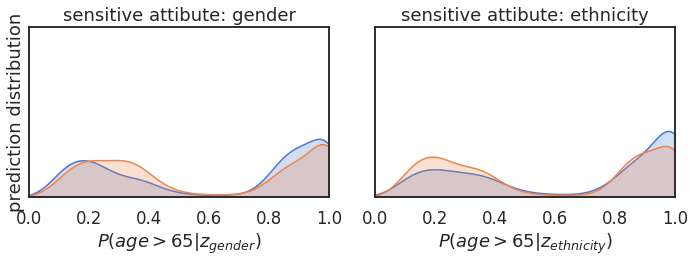

In [63]:
fig = plot_distributions(y_pred, Z_test, fname='biased_training.png')

In [64]:
def p_rule(y_pred, z_values, threshold=0.5):
    y_z_1 = y_pred[z_values == 1] > threshold if threshold else y_pred[z_values == 1]
    y_z_0 = y_pred[z_values == 0] > threshold if threshold else y_pred[z_values == 0]
    odds = y_z_1.mean() / y_z_0.mean()
    return np.min([odds, 1/odds]) * 100

In [65]:
print(f"\tgiven attribute ethnicity; {p_rule(y_pred, Z_test['ethnicity']):.0f}%-rule")
print(f"\tgiven attribute gender;  {p_rule(y_pred, Z_test['gender']):.0f}%-rule")

	given attribute ethnicity; 83%-rule
	given attribute gender;  86%-rule


In [66]:
class FairClassifier1(object):
    
    def __init__(self, n_features, n_sensitive, lambdas):
        self.lambdas = lambdas
        
        clf_inputs = Input(shape=(n_features,))
        adv_inputs = Input(shape=(1,))
        
        clf_net = self._create_clf_net(clf_inputs)
        adv_net = self._create_adv_net(adv_inputs, n_sensitive)
        self._trainable_clf_net = self._make_trainable(clf_net)
        self._trainable_adv_net = self._make_trainable(adv_net)
        self._clf = self._compile_clf(clf_net)
        self._clf_w_adv = self._compile_clf_w_adv(clf_inputs, clf_net, adv_net)
        self._adv = self._compile_adv(clf_inputs, clf_net, adv_net, n_sensitive)
        self._val_metrics = None
        self._fairness_metrics = None
        
        self.predict = self._clf.predict
        
    def _make_trainable(self, net):
        def make_trainable(flag):
            net.trainable = flag
            for layer in net.layers:
                layer.trainable = flag
        return make_trainable
        
    def _create_clf_net(self, inputs):
        dense1 = Dense(32, activation='relu')(inputs)
        dropout1 = Dropout(0.2)(dense1)
        dense2 = Dense(32, activation='relu')(dropout1)
        dropout2 = Dropout(0.2)(dense2)
        dense3 = Dense(32, activation='relu')(dropout2)
        dropout3 = Dropout(0.2)(dense3)
        outputs = Dense(1, activation='sigmoid', name='y')(dropout3)
        return Model(inputs=[inputs], outputs=[outputs])
        
    def _create_adv_net(self, inputs, n_sensitive):
        dense1 = Dense(32, activation='relu')(inputs)
        dense2 = Dense(32, activation='relu')(dense1)
        dense3 = Dense(32, activation='relu')(dense2)
        outputs = [Dense(1, activation='sigmoid')(dense3) for _ in range(n_sensitive)]
        return Model(inputs=[inputs], outputs=outputs)

    def _compile_clf(self, clf_net):
        clf = clf_net
        self._trainable_clf_net(True)
        clf.compile(loss='binary_crossentropy', optimizer='adam')
        return clf
        
    def _compile_clf_w_adv(self, inputs, clf_net, adv_net):
        clf_w_adv = Model(inputs=[inputs], outputs=[clf_net(inputs)]+adv_net(clf_net(inputs)))
        self._trainable_clf_net(True)
        self._trainable_adv_net(False)
        loss_weights = [1.]+[-lambda_param for lambda_param in self.lambdas]
        clf_w_adv.compile(loss=['binary_crossentropy']*(len(loss_weights)), 
                          loss_weights=loss_weights,
                          optimizer='adam')
        return clf_w_adv

    def _compile_adv(self, inputs, clf_net, adv_net, n_sensitive):
        adv = Model(inputs=[inputs], outputs=adv_net(clf_net(inputs)))
        self._trainable_clf_net(False)
        self._trainable_adv_net(True)
        adv.compile(loss=['binary_crossentropy']*n_sensitive, optimizer='adam')
        return adv

    def _compute_class_weights(self, data_set):
        class_values = [0, 1]
        class_weights = []
        if len(data_set.shape) == 1:
            balanced_weights = compute_class_weight('balanced', class_values, data_set)
            class_weights.append(dict(zip(class_values, balanced_weights)))
        else:
            n_attr =  data_set.shape[1]
            for attr_idx in range(n_attr):
                balanced_weights = compute_class_weight('balanced', class_values,
                                                        np.array(data_set)[:,attr_idx])
                class_weights.append(dict(zip(class_values, balanced_weights)))
        return class_weights
    
    def _compute_target_class_weights(self, y):
        class_values  = [0,1]
        balanced_weights =  compute_class_weight('balanced', class_values, y)
        class_weights = {'y': dict(zip(class_values, balanced_weights))}
        return class_weights
        
    def pretrain(self, x, y, z, epochs=10, verbose=0):
        self._trainable_clf_net(True)
        self._clf.fit(x.values, y.values, epochs=epochs, verbose=verbose)
        self._trainable_clf_net(False)
        self._trainable_adv_net(True)
        class_weight_adv = self._compute_class_weights(z)
        self._adv.fit(x.values, np.hsplit(z.values, z.shape[1]), 
                      epochs=epochs, verbose=verbose)
        
    def fit(self, x, y, z, validation_data=None, T_iter=250, batch_size=128,
            save_figs=False):
        n_sensitive = z.shape[1]
        if validation_data is not None:
            x_val, y_val, z_val = validation_data

        class_weight_adv = self._compute_class_weights(z)
        class_weight_clf_w_adv = [{0:1., 1:1.}]+class_weight_adv
        self._val_metrics = pd.DataFrame()
        self._fairness_metrics = pd.DataFrame()  
        for idx in range(T_iter):
            if validation_data is not None:
                y_pred = pd.Series(self._clf.predict(x_val).ravel(), index=y_val.index)
                self._val_metrics.loc[idx, 'ROC AUC'] = roc_auc_score(y_val, y_pred)
                self._val_metrics.loc[idx, 'Accuracy'] = (accuracy_score(y_val, (y_pred>0.5))*100)
                for sensitive_attr in z_val.columns:
                    self._fairness_metrics.loc[idx, sensitive_attr] = p_rule(y_pred,
                                                                             z_val[sensitive_attr])
                #display.clear_output(wait=True)
                plot_distributions(y_pred, z_val, idx+1, self._val_metrics.loc[idx],
                                   self._fairness_metrics.loc[idx], 
                                   fname=f'output/{idx+1:08d}.png' if save_figs else None)
                plt.show(plt.gcf())
            
            # train adverserial
            self._trainable_clf_net(False)
            self._trainable_adv_net(True)
            self._adv.fit(x.values, np.hsplit(z.values, z.shape[1]), batch_size=batch_size, epochs=1, verbose=0)
            
            # train classifier
            self._trainable_clf_net(True)
            self._trainable_adv_net(False)
            indices = np.random.permutation(len(x))[:batch_size]
            #self._clf_w_adv.train_on_batch(x.values[indices],[y.values[indices]]+np.hsplit(z.values[indices], n_sensitive),)

In [67]:
class FairClassifier2(object):
    
    def __init__(self, n_features, n_sensitive, lambdas):
        self.lambdas = lambdas
        
        clf_inputs = Input(shape=(n_features,))
        adv_inputs = Input(shape=(1,))
        
        clf_net = self._create_clf_net(clf_inputs)
        adv_net = self._create_adv_net(adv_inputs, n_sensitive)
        self._trainable_clf_net = self._make_trainable(clf_net)
        self._trainable_adv_net = self._make_trainable(adv_net)
        self._clf = self._compile_clf(clf_net)
        self._clf_w_adv = self._compile_clf_w_adv(clf_inputs, clf_net, adv_net)
        self._adv = self._compile_adv(clf_inputs, clf_net, adv_net, n_sensitive)
        self._val_metrics = None
        self._fairness_metrics = None
        
        self.predict = self._clf.predict
        
    def _make_trainable(self, net):
        def make_trainable(flag):
            net.trainable = flag
            for layer in net.layers:
                layer.trainable = flag
        return make_trainable
        
    def _create_clf_net(self, inputs):
        dense1 = Dense(32, activation='relu')(inputs)
        dropout1 = Dropout(0.2)(dense1)
        dense2 = Dense(32, activation='relu')(dropout1)
        dropout2 = Dropout(0.2)(dense2)
        dense3 = Dense(32, activation='relu')(dropout2)
        dropout3 = Dropout(0.2)(dense3)
        outputs = Dense(1, activation='sigmoid', name='y')(dropout3)
        return Model(inputs=[inputs], outputs=[outputs])
        
    def _create_adv_net(self, inputs, n_sensitive):
        dense1 = Dense(32, activation='relu')(inputs)
        dense2 = Dense(32, activation='relu')(dense1)
        dense3 = Dense(32, activation='relu')(dense2)
        outputs = [Dense(1, activation='sigmoid')(dense3) for _ in range(n_sensitive)]
        return Model(inputs=[inputs], outputs=outputs)

    def _compile_clf(self, clf_net):
        clf = clf_net
        self._trainable_clf_net(True)
        clf.compile(loss='binary_crossentropy', optimizer='adam')
        return clf
        
    def _compile_clf_w_adv(self, inputs, clf_net, adv_net):
        clf_w_adv = Model(inputs=[inputs], outputs=[clf_net(inputs)]+adv_net(clf_net(inputs)))
        self._trainable_clf_net(True)
        self._trainable_adv_net(False)
        loss_weights = [1.]+[-lambda_param for lambda_param in self.lambdas]
        clf_w_adv.compile(loss=['binary_crossentropy']*(len(loss_weights)), 
                          loss_weights=loss_weights,
                          optimizer='adam')
        return clf_w_adv

    def _compile_adv(self, inputs, clf_net, adv_net, n_sensitive):
        adv = Model(inputs=[inputs], outputs=adv_net(clf_net(inputs)))
        self._trainable_clf_net(False)
        self._trainable_adv_net(True)
        adv.compile(loss=['binary_crossentropy']*n_sensitive, optimizer='adam')
        return adv

    def _compute_class_weights(self, data_set):
        class_values = [0, 1]
        class_weights = []
        if len(data_set.shape) == 1:
            balanced_weights = compute_class_weight('balanced', class_values, data_set)
            class_weights.append(dict(zip(class_values, balanced_weights)))
        else:
            n_attr =  data_set.shape[1]
            for attr_idx in range(n_attr):
                balanced_weights = compute_class_weight('balanced', class_values,
                                                        np.array(data_set)[:,attr_idx])
                class_weights.append(dict(zip(class_values, balanced_weights)))
        return class_weights
    
    def _compute_target_class_weights(self, y):
        class_values  = [0,1]
        balanced_weights =  compute_class_weight('balanced', class_values, y)
        class_weights = {'y': dict(zip(class_values, balanced_weights))}
        return class_weights
        
    def pretrain(self, x, y, z, epochs=10, verbose=0):
        self._trainable_clf_net(True)
        self._clf.fit(x.values, y.values, epochs=epochs, verbose=verbose)
        self._trainable_clf_net(False)
        self._trainable_adv_net(True)
        class_weight_adv = self._compute_class_weights(z)
        self._adv.fit(x.values, np.hsplit(z.values, z.shape[1]), 
                      epochs=epochs, verbose=verbose)
        
    def fit(self, x, y, z, validation_data=None, T_iter=250, batch_size=128,
            save_figs=False):
        n_sensitive = z.shape[1]
        if validation_data is not None:
            x_val, y_val, z_val = validation_data

        class_weight_adv = self._compute_class_weights(z)
        class_weight_clf_w_adv = [{0:1., 1:1.}]+class_weight_adv
        self._val_metrics = pd.DataFrame()
        self._fairness_metrics = pd.DataFrame()  
        for idx in range(T_iter):
            if validation_data is not None:
                y_pred = pd.Series(self._clf.predict(x_val).ravel(), index=y_val.index)
                self._val_metrics.loc[idx, 'ROC AUC'] = roc_auc_score(y_val, y_pred)
                self._val_metrics.loc[idx, 'Accuracy'] = (accuracy_score(y_val, (y_pred>0.5))*100)
                for sensitive_attr in z_val.columns:
                    self._fairness_metrics.loc[idx, sensitive_attr] = p_rule(y_pred,
                                                                             z_val[sensitive_attr])
                #display.clear_output(wait=True)
                plot_distributions(y_pred, z_val, idx+1, self._val_metrics.loc[idx],
                                   self._fairness_metrics.loc[idx], 
                                   fname=f'output/{idx+1:08d}.png' if save_figs else None)
                plt.show(plt.gcf())
            
            # train adverserial
            self._trainable_clf_net(False)
            self._trainable_adv_net(True)
            #self._adv.fit(x.values, np.hsplit(z.values, z.shape[1]), batch_size=batch_size, epochs=1, verbose=0)
            
            # train classifier
            self._trainable_clf_net(True)
            self._trainable_adv_net(False)
            indices = np.random.permutation(len(x))[:batch_size]
            self._clf_w_adv.train_on_batch(x.values[indices],[y.values[indices]]+np.hsplit(z.values[indices], n_sensitive),)

In [68]:
class FairClassifier3(object):
    
    def __init__(self, n_features, n_sensitive, lambdas):
        self.lambdas = lambdas
        
        clf_inputs = Input(shape=(n_features,))
        adv_inputs = Input(shape=(1,))
        
        clf_net = self._create_clf_net(clf_inputs)
        adv_net = self._create_adv_net(adv_inputs, n_sensitive)
        self._trainable_clf_net = self._make_trainable(clf_net)
        self._trainable_adv_net = self._make_trainable(adv_net)
        self._clf = self._compile_clf(clf_net)
        self._clf_w_adv = self._compile_clf_w_adv(clf_inputs, clf_net, adv_net)
        self._adv = self._compile_adv(clf_inputs, clf_net, adv_net, n_sensitive)
        self._val_metrics = None
        self._fairness_metrics = None
        
        self.predict = self._clf.predict
        
    def _make_trainable(self, net):
        def make_trainable(flag):
            net.trainable = flag
            for layer in net.layers:
                layer.trainable = flag
        return make_trainable
        
    def _create_clf_net(self, inputs):
        dense1 = Dense(32, activation='relu')(inputs)
        dropout1 = Dropout(0.2)(dense1)
        dense2 = Dense(32, activation='relu')(dropout1)
        dropout2 = Dropout(0.2)(dense2)
        dense3 = Dense(32, activation='relu')(dropout2)
        dropout3 = Dropout(0.2)(dense3)
        outputs = Dense(1, activation='sigmoid', name='y')(dropout3)
        return Model(inputs=[inputs], outputs=[outputs])
        
    def _create_adv_net(self, inputs, n_sensitive):
        dense1 = Dense(32, activation='relu')(inputs)
        dense2 = Dense(32, activation='relu')(dense1)
        dense3 = Dense(32, activation='relu')(dense2)
        outputs = [Dense(1, activation='sigmoid')(dense3) for _ in range(n_sensitive)]
        return Model(inputs=[inputs], outputs=outputs)

    def _compile_clf(self, clf_net):
        clf = clf_net
        self._trainable_clf_net(True)
        clf.compile(loss='binary_crossentropy', optimizer='adam')
        return clf
        
    def _compile_clf_w_adv(self, inputs, clf_net, adv_net):
        clf_w_adv = Model(inputs=[inputs], outputs=[clf_net(inputs)]+adv_net(clf_net(inputs)))
        self._trainable_clf_net(True)
        self._trainable_adv_net(False)
        loss_weights = [1.]+[-lambda_param for lambda_param in self.lambdas]
        clf_w_adv.compile(loss=['binary_crossentropy']*(len(loss_weights)), 
                          loss_weights=loss_weights,
                          optimizer='adam')
        return clf_w_adv

    def _compile_adv(self, inputs, clf_net, adv_net, n_sensitive):
        adv = Model(inputs=[inputs], outputs=adv_net(clf_net(inputs)))
        self._trainable_clf_net(False)
        self._trainable_adv_net(True)
        adv.compile(loss=['binary_crossentropy']*n_sensitive, optimizer='adam')
        return adv

    def _compute_class_weights(self, data_set):
        class_values = [0, 1]
        class_weights = []
        if len(data_set.shape) == 1:
            balanced_weights = compute_class_weight('balanced', class_values, data_set)
            class_weights.append(dict(zip(class_values, balanced_weights)))
        else:
            n_attr =  data_set.shape[1]
            for attr_idx in range(n_attr):
                balanced_weights = compute_class_weight('balanced', class_values,
                                                        np.array(data_set)[:,attr_idx])
                class_weights.append(dict(zip(class_values, balanced_weights)))
        return class_weights
    
    def _compute_target_class_weights(self, y):
        class_values  = [0,1]
        balanced_weights =  compute_class_weight('balanced', class_values, y)
        class_weights = {'y': dict(zip(class_values, balanced_weights))}
        return class_weights
        
    def pretrain(self, x, y, z, epochs=10, verbose=0):
        self._trainable_clf_net(True)
        self._clf.fit(x.values, y.values, epochs=epochs, verbose=verbose)
        self._trainable_clf_net(False)
        self._trainable_adv_net(True)
        class_weight_adv = self._compute_class_weights(z)
        self._adv.fit(x.values, np.hsplit(z.values, z.shape[1]), 
                      epochs=epochs, verbose=verbose)
        
    def fit(self, x, y, z, validation_data=None, T_iter=250, batch_size=128,
            save_figs=False):
        n_sensitive = z.shape[1]
        if validation_data is not None:
            x_val, y_val, z_val = validation_data

        class_weight_adv = self._compute_class_weights(z)
        class_weight_clf_w_adv = [{0:1., 1:1.}]+class_weight_adv
        self._val_metrics = pd.DataFrame()
        self._fairness_metrics = pd.DataFrame()  
        for idx in range(T_iter):
            if validation_data is not None:
                y_pred = pd.Series(self._clf.predict(x_val).ravel(), index=y_val.index)
                self._val_metrics.loc[idx, 'ROC AUC'] = roc_auc_score(y_val, y_pred)
                self._val_metrics.loc[idx, 'Accuracy'] = (accuracy_score(y_val, (y_pred>0.5))*100)
                for sensitive_attr in z_val.columns:
                    self._fairness_metrics.loc[idx, sensitive_attr] = p_rule(y_pred,
                                                                             z_val[sensitive_attr])
                #display.clear_output(wait=True)
                plot_distributions(y_pred, z_val, idx+1, self._val_metrics.loc[idx],
                                   self._fairness_metrics.loc[idx], 
                                   fname=f'output/{idx+1:08d}.png' if save_figs else None)
                plt.show(plt.gcf())
            
            # train adverserial
            self._trainable_clf_net(False)
            self._trainable_adv_net(True)
            #self._adv.fit(x.values, np.hsplit(z.values, z.shape[1]), batch_size=batch_size, epochs=1, verbose=0)
            
            # train classifier
            self._trainable_clf_net(True)
            self._trainable_adv_net(False)
            indices = np.random.permutation(len(x))[:batch_size]
            #self._clf_w_adv.train_on_batch(x.values[indices],[y.values[indices]]+np.hsplit(z.values[indices], n_sensitive),)

In [69]:
clf = FairClassifier1(n_features=X_train.shape[1], n_sensitive=Z_train.shape[1],
                     lambdas=[130., 30.])
clf2 = FairClassifier2(n_features=X_train.shape[1], n_sensitive=Z_train.shape[1],
                     lambdas=[130., 30.])
clf3 = FairClassifier3(n_features=X_train.shape[1], n_sensitive=Z_train.shape[1],
                     lambdas=[130., 30.])

In [70]:
print(X_train.shape[1])
print(Z_train.shape[1])

42
2


In [71]:
# pre-train both adverserial and classifier networks
#clf.pretrain(X_train, y_train, Z_train, verbose=0, epochs=5)

In [72]:
Z_test.shape

(29488, 2)

In [73]:
test = validation_data=(X_test, y_test, Z_test)
test

(        hadm_id   LOSdays  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  \
 36190  0.398568 -0.260405     0.302127      0.175648 -0.215348      0.100442   
 42381  0.759626  4.671143    -0.599917     -0.318556 -0.179838     -0.466403   
 6996  -1.327511 -0.481101    -0.599917     -0.061419  0.049607     -0.466403   
 6926  -1.332447  0.060607    -0.599917     -0.185597  0.137015     -0.146200   
 55839  1.550909 -0.628767    -0.599917     -0.061419  0.022292     -0.466403   
 ...         ...       ...          ...           ...       ...           ...   
 27270 -0.130298 -0.541291    -0.599917      0.072793  0.106969      0.303814   
 29776  0.016412 -0.023659     0.001446     -0.270891 -0.130671      0.282179   
 33916  0.261694 -0.485114     0.903490      0.156833  0.186182     -0.146200   
 11489 -1.066276  0.060607    -0.599917     -0.173054 -0.166181     -0.068313   
 12022 -1.034299 -0.508387     0.963626     -0.070200 -0.144329      0.334103   
 
        NumInput   NumLabs

In [76]:
#clf.fit(X_train, y_train, Z_train,validation_data=(X_test, y_test, Z_test), T_iter=1)

In [77]:
#clf2.fit(X_train, y_train, Z_train, validation_data=(X_test, y_test, Z_test), T_iter=1)

In [78]:
#clf3.fit(X_train, y_train, Z_train,validation_data=(X_test, y_test, Z_test), T_iter=1)